In [1]:
import matplotlib.pyplot as plt
import pickle
from itertools import cycle

In [12]:
ocean = 'south_pacific'

In [13]:
# Getting back the objects:
with open('roc_data_' + ocean + '.pkl', 'rb') as f: 
   metrics_train, metrics_test, roc_data_train, roc_data_test = pickle.load(f)

In [7]:
no_of_output_steps = input("No of output steps (1 to 6): ")
model = input("Model (vanilla/bidirectional/cnn-lstm/conv-lstm): ")
time_step = input("Which time step (1 to total no of output steps): ")

No of output steps (1 to 6): 2
Model (vanilla/bidirectional/cnn-lstm/conv-lstm): bidirectional
Which time step (1 to total no of output steps): 2


In [8]:
print(no_of_output_steps, model, time_step)

2 bidirectional 2


In [15]:
train_or_test = 'train'

<Figure size 432x288 with 0 Axes>

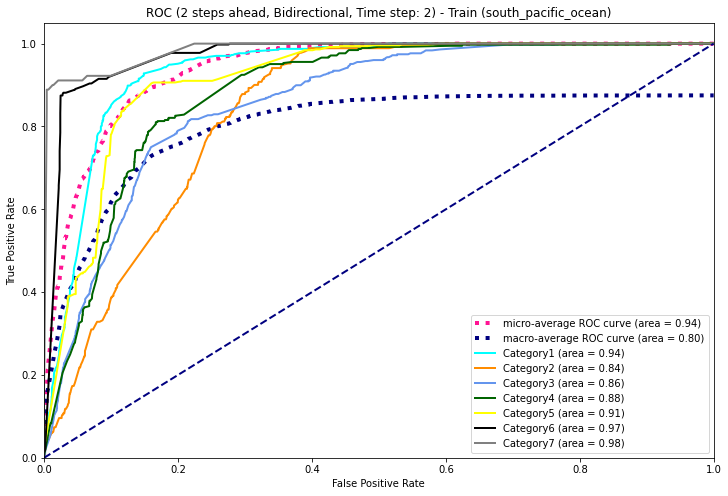

In [17]:
plt.figure()
fig = plt.subplots(figsize =(12, 8))

lw = 2 # line_width
n_classes = 8
if train_or_test == 'test':
    data = roc_data_train
else:
    data = roc_data_test
    
plt.plot(data[str(no_of_output_steps)][model][str(time_step)]['fpr']['micro'], data[str(no_of_output_steps)][model][str(time_step)]['tpr']['micro'], color='deeppink',
         lw=4, label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(data[str(no_of_output_steps)][model][str(time_step)]['roc_auc']['micro']),
        linestyle=':')

plt.plot(data[str(no_of_output_steps)][model][str(time_step)]['fpr']['macro'], data[str(no_of_output_steps)][model][str(time_step)]['tpr']['macro'], color='navy',
         lw=4, label='macro-average ROC curve (area = {0:0.2f})'
         ''.format(data[str(no_of_output_steps)][model][str(time_step)]['roc_auc']['macro']),
        linestyle=':')

colors = colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'darkgreen', 'yellow', 'black', 'grey'])


for i, color in zip(range(1, n_classes), colors):
    plt.plot(data[str(no_of_output_steps)][model][str(time_step)]['fpr'][str(i)], data[str(no_of_output_steps)][model][str(time_step)]['tpr'][str(i)], color=color,
         lw=lw, label='Category' + str(i) +  ' (area = %0.2f)' % data[str(no_of_output_steps)][model][str(time_step)]['roc_auc'][str(i)])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC' + ' (' + str(no_of_output_steps) + ' steps ahead, ' + model.capitalize() + ', Time step: ' + str(time_step) + ') - ' + train_or_test.capitalize() + ' (' + ocean + '_ocean)')
plt.legend(loc="lower right")
plt.show()